**Business Objective:**

To develop a predictive model that classifies individuals as Introverts or Extroverts based on their social behavior and activity patterns, helping businesses tailor products, services, or marketing strategies to better suit personality-driven preferences.


| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `Time_spent_Alone`          | Number of hours a person spends alone on average daily.                    |
| `Stage_fear`                | Indicates whether the person has fear of public speaking (Yes/No).         |
| `Social_event_attendance`   | Number of social events attended in a month.                               |
| `Going_outside`             | Indicates if the person willingly goes outside regularly (Yes/No).         |
| `Drained_after_socializing`| Indicates if the person feels mentally drained after social interactions.  |
| `Friends_circle_size`       | Number of close or frequent friends in the person’s circle.                |
| `Post_frequency`            | Number of posts shared on social media per week.                          |
| `Personality`               | Target variable; indicates if the person is an Introvert or Extrovert.     |


In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/personality_dataset.csv")
df.shape

(5000, 8)

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [4]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert
4999,4,Yes,6,7,No,12,3,Extrovert


In [5]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [7]:
# checking for dupicates and null values
print("Before Removing Duplicates: ",df.duplicated().sum()," : ", df.shape)
df.drop_duplicates(inplace=True)
print("After Removing Duplicates: ",df.duplicated().sum(), " : ",df.shape)

Before Removing Duplicates:  128  :  (5000, 8)
After Removing Duplicates:  0  :  (4872, 8)


In [8]:
print(df.isnull().sum().sum())

0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,4872.0,4.976190,3.038156,0.0,3.0,5.0,7.0,11.0
Social_event_attendance,4872.0,4.993842,2.855725,0.0,3.0,5.0,7.0,10.0
Going_outside,4872.0,3.517857,2.089579,0.0,2.0,4.0,5.0,7.0
Friends_circle_size,4872.0,7.254310,4.058642,0.0,5.0,7.0,10.0,15.0
Post_frequency,4872.0,4.758621,2.783804,0.0,3.0,5.0,7.0,10.0


**Basic DataSet Summary:**

* Total number of data points are: (Rows = 5000, columns = 8)
* These are the columns we will be working with: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality']
* We have a total of 5 numerical columns and 3 categorical columns.
* There were quite a few number of duplicated rows, we handled them.
* Fortunately we don't have any null values in any columns.

In [10]:
# Let's separate categorical and numerical columns
col = df.dtypes == object
obj_cols = (col[col] == True).index

col = df.dtypes != object
num_cols = (col[col] == True).index

print("Categorical Columns are: ", obj_cols)
print("Numerical Columns are: ", num_cols)

Categorical Columns are:  Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Numerical Columns are:  Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


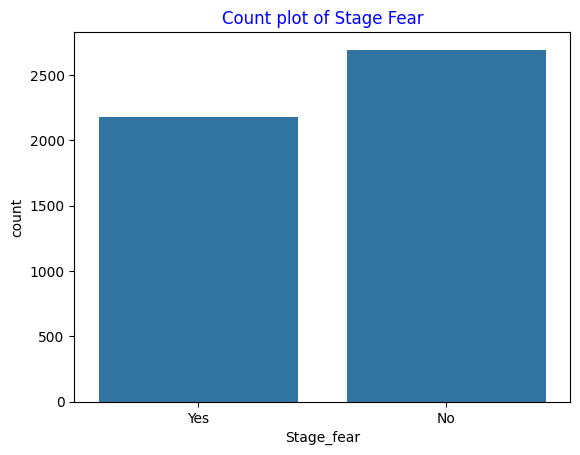

In [11]:
# Count plot of categorical columns
sns.countplot(x=df['Stage_fear'])
plt.title("Count plot of Stage Fear", color="blue")
plt.show()

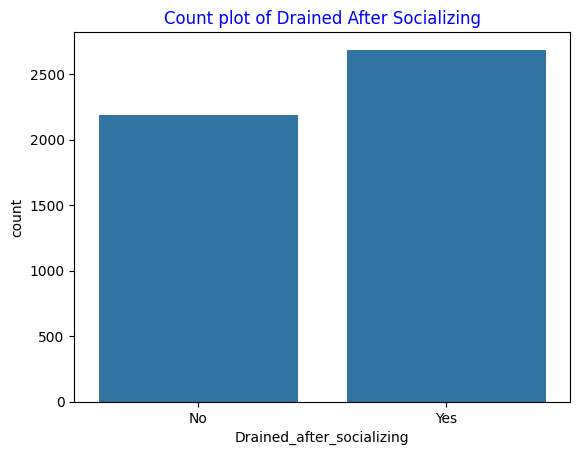

In [12]:
# Count plot of categorical columns
sns.countplot(x=df['Drained_after_socializing'])
plt.title("Count plot of Drained After Socializing", color="blue")
plt.show()

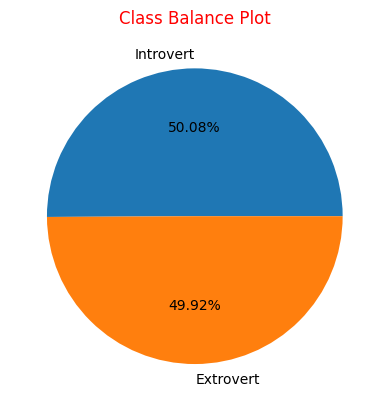

In [13]:
# Checking for imbalance class
plt.pie(df['Personality'].value_counts(), autopct="%.2f%%", labels=df['Personality'].value_counts().index)
plt.title("Class Balance Plot", color="red")
plt.show()

* Classes appears to be balanced, which is a good thiing for us since we don't need to resample the data or use StratifiedShuffle.

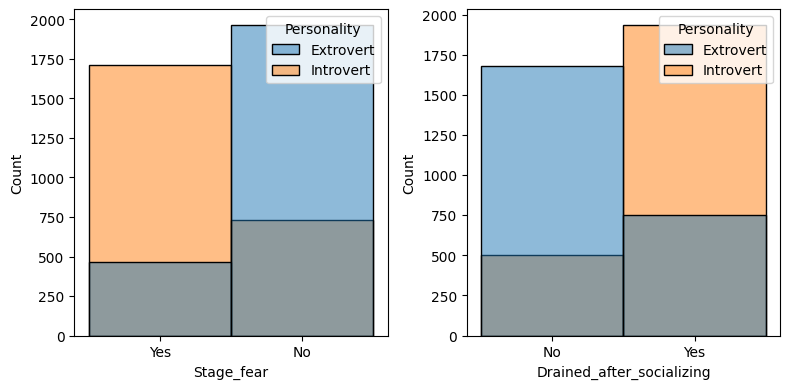

In [14]:
plt.figure(figsize=(8, 4))
index=0
for col in obj_cols[:2]:
    index += 1
    plt.subplot(1, 2, index)
    sns.histplot(x=col, hue="Personality", data=df, alpha=0.5)
plt.tight_layout()
plt.show()

* Fairly strong numbers here could be a reason for person being introvert or extrovert.
* Mostly extroverts tends to have lesser stage_fear which makes sense since they are fairly confident while socializing on the other hand most introverts are not.
* Most extroverts appear to be drained after socializing which does make sense if you approach this with a different perspective. The perspective being you involve yourself so much in that process that you drain all of your energy for the sake o it on the other hand if you are an introvert you wouldn't wanna spend a lot of energy to see your point across.

In [15]:
# Let's fix these coulumns and make them machine feedable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df[['Drained_after_socializing', 'Stage_fear']])
encoded_features_names = encoder.get_feature_names_out()
df[encoded_features_names] = encoded_cols
df.drop(columns=['Drained_after_socializing', 'Stage_fear'], axis=1, inplace=True)
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Drained_after_socializing_No,Drained_after_socializing_Yes,Stage_fear_No,Stage_fear_Yes
0,3,6,7,14,5,Extrovert,1.0,0.0,0.0,1.0
1,2,8,6,7,8,Extrovert,1.0,0.0,1.0,0.0
2,1,9,4,9,3,Extrovert,1.0,0.0,1.0,0.0
3,8,0,0,9,3,Introvert,0.0,1.0,1.0,0.0
4,5,3,0,2,6,Introvert,1.0,0.0,0.0,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4872 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               4872 non-null   int64  
 1   Social_event_attendance        4872 non-null   int64  
 2   Going_outside                  4872 non-null   int64  
 3   Friends_circle_size            4872 non-null   int64  
 4   Post_frequency                 4872 non-null   int64  
 5   Personality                    4872 non-null   object 
 6   Drained_after_socializing_No   4872 non-null   float64
 7   Drained_after_socializing_Yes  4872 non-null   float64
 8   Stage_fear_No                  4872 non-null   float64
 9   Stage_fear_Yes                 4872 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 418.7+ KB


* Everything looks good now we need to work on the target column and convert it into numerical column.

In [17]:
# Converting target column from objective type to numeric type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])

In [18]:
print(df.Personality.sample(5))
print("Calsses: ",le.classes_)

3622    0
2942    0
1700    1
1513    0
2030    0
Name: Personality, dtype: int64
Calsses:  ['Extrovert' 'Introvert']


* Here we can see a sample of target column after transforming it and their relative classes.
* It goes like Extrovert -> 0 and Introvert -> 1
* Now our data is ready for model building.

In [19]:
# Feature Selectiong
X =  df.drop("Personality", axis=1)
Y = df['Personality']
X.shape, Y.shape

((4872, 9), (4872,))

In [20]:
# Splitting the data for training and testing
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape


Now we have successfully splitted the data for training and testing purpose along with proper features and target column.

In [21]:
# (Optional): Imagine yourself in a position not able to utilize sklearn for some reason, how will you split the data for training and testing?
split = int((len(df)*.8))

train_data = df.sample(split, random_state=45)
test_data = df.drop(train_data.index)
train_data.shape, test_data.shape

((3897, 10), (975, 10))

In [22]:
# Getting training and testing validation data
y_train = train_data.pop("Personality")
y_test = test_data.pop("Personality")

y_train.shape, y_test.shape

((3897,), (975,))

In [23]:
# Getting training and testing data of feature part
x_train, x_test = train_data, test_data
x_train.shape, x_test.shape

((3897, 9), (975, 9))

In [24]:
x_train.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Drained_after_socializing_No,Drained_after_socializing_Yes,Stage_fear_No,Stage_fear_Yes
534,5,0,2,9,1,0.0,1.0,0.0,1.0
3685,6,5,2,3,0,0.0,1.0,0.0,1.0
1399,5,3,4,9,4,0.0,1.0,0.0,1.0
1390,7,0,0,6,5,0.0,1.0,0.0,1.0
990,4,4,4,9,2,0.0,1.0,1.0,0.0


In [25]:
y_train.head()

,Personality
534,1
3685,1
1399,1
1390,1
990,1


* Here we can confirm that our index matches and we finally performed splitting the data without using sklearn.